## What is K-Nearest Neighbor (KNN)?

K-Nearest Neighbors, or **KNN** for short, is one of the simplest machine learning algorithms and is used in a wide array of institutions. KNN is a `non-parametric`, `lazy learning` algorithm.



* When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. In other words, it makes its selection based off of the proximity to other data points regardless of what feature the numerical values represent.

* Being a lazy learning algorithm implies that there is little to no training phase. Therefore, we can immediately classify new data points as they present themselves.

> K-NN is a lazy learner because it doesn’t learn a discriminative function from the training data but “memorizes” the training dataset instead.
For example, the logistic regression algorithm learns its model weights (parameters) during training time. In contrast, there is no training time in K-NN.

**To summarize: An eager learner has a model fitting or training step. A lazy learner does not have a training phase.**

<img src = "https://miro.medium.com/max/1400/1*YWKvGH4kKOtCvlX950LM9g.jpeg" width=75%>

## The ``K`` in KNN  
- `k` is the number of nearest neighbors to consider when making a prediction.
- The choice of `k` strongly affects bias–variance tradeoff:
  - **Small k** → model is more flexible, but more sensitive to noise (overfitting).  
  - **Large k** → smoother decision boundary, but risk of underfitting, smoothing out relevant patterns.  
- It’s common to pick odd values for `k` in classification to avoid ties.   
- Methods to choose `k`:
  - **Cross-validation**: try different k values, evaluate accuracy (or other metric) via cross-validation, pick best.
  - **Elbow method**: plot error (or accuracy) vs k, look for a “knee/elbow” in the curve.  


## Distance Metrics

The distance metric is the effective hyper-parameter through which we measure the distance between data feature values and new test inputs.



- **Euclidean Distance**:  

  $d(x, y) = \sqrt{\sum_{i=1}^{d} (x_i - y_i)^2}$  

- **Manhattan Distance**:  

  $d(x, y) = \sum_{i=1}^{d} |x_i - y_i|$  

- **Minkowski Distance**:  

  $d(x, y) = \left( \sum_{i=1}^{d} |x_i - y_i|^p \right)^{1/p}$  

  - if $p = 1$: Manhattan  
  - if $p = 2$: Euclidean  

---


<img src = "https://miro.medium.com/max/1400/1*_i1PCxvSDw5TIfzyq90aag.png" width=50%>


## How KNN Works  
1. Select `k`.  
2. Compute distance from query point to all training samples.  
3. Sort distances and pick the smallest `k`.  
4. For Classification → majority vote  
   For Regression → mean (or weighted mean)

# Advantages & Disadvantages  of KNN

**Advantages**  
- Very intuitive  
- Simple implementation  
- Minimal hyperparameters  
- Works for both classification & regression  

**Disadvantages**  
- Prediction time can be very slow for large datasets  
- Performance degrades in high-dimensional data  
- Sensitive to noise and irrelevant features  
- Requires good feature scaling  

# Breast Cancer Classification using KNN

## Introduction
In this project, we will apply the **K-Nearest Neighbors (KNN)** algorithm to the **Breast Cancer Wisconsin Dataset**, which is available in the `scikit-learn` library.  

The dataset consists of **569 samples** with **30 numerical features** that describe the characteristics of cell nuclei present in a breast mass.  
Each sample is labeled as either:  
- **Malignant (cancerous)**  
- **Benign (non-cancerous)**  

Our main goal is to build a classification model that can **predict whether a tumor is malignant or benign** based on these features.  

---

## Why is this important?
Early and accurate detection of breast cancer is crucial in healthcare, as it can significantly improve treatment outcomes and survival rates. Machine learning models, like KNN, can assist doctors by providing a second opinion or automated screening support.  

---

## What will we do?
1. **Explore and prepare the dataset** (load, split into train/test, scale features).  
2. **Apply the KNN algorithm** for classification.  
3. **Evaluate the model** using different performance metrics such as Accuracy, Precision, Recall, F1-score, Confusion Matrix, and AUC-ROC.  
4. **Optimize** the value of `k` to achieve the best performance.  

---

By the end of this project, we will have a clear understanding of how KNN works on a real-world dataset and how well it can perform in a critical application such as **cancer detection**.


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [3]:
cancer.data.shape

(569, 30)

In [4]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print(cancer.target_names)

['malignant' 'benign']


<img src = "https://miro.medium.com/max/875/1*-7Gwli-yhmHA7XNRmJwSRg.jpeg" width=60%>


In [12]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

In [13]:
# Append the Target column to the DataFrame for comprehensive analysis
X['Target'] = y

In [14]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
# The large variance between min, max, and std shows a strong need for scaling
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


/tmp/ipython-input-3024903977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=X, palette='viridis')


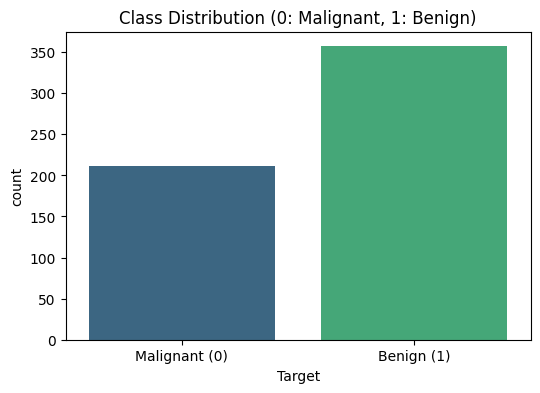

In [16]:
# Check Class Balance using a count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=X, palette='viridis')
plt.title('Class Distribution (0: Malignant, 1: Benign)')
plt.xticks([0, 1], ['Malignant (0)', 'Benign (1)'])
plt.show()

In [17]:
# Calculate exact percentages
class_counts = y.value_counts(normalize=True) * 100
print("\nClass Percentages:")
print(f"Benign (1): {class_counts[1]:.2f}%")
print(f"Malignant (0): {class_counts[0]:.2f}%")
# Result: The dataset is relatively balanced, which is good.


Class Percentages:
Benign (1): 62.74%
Malignant (0): 37.26%


In [18]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Extract and sort correlations with the Target variable
target_correlation = correlation_matrix['Target'].sort_values(ascending=False)

print("\nFeature Importance Estimation via Correlation with Target:")
print(target_correlation)


Feature Importance Estimation via Correlation with Target:
Target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean

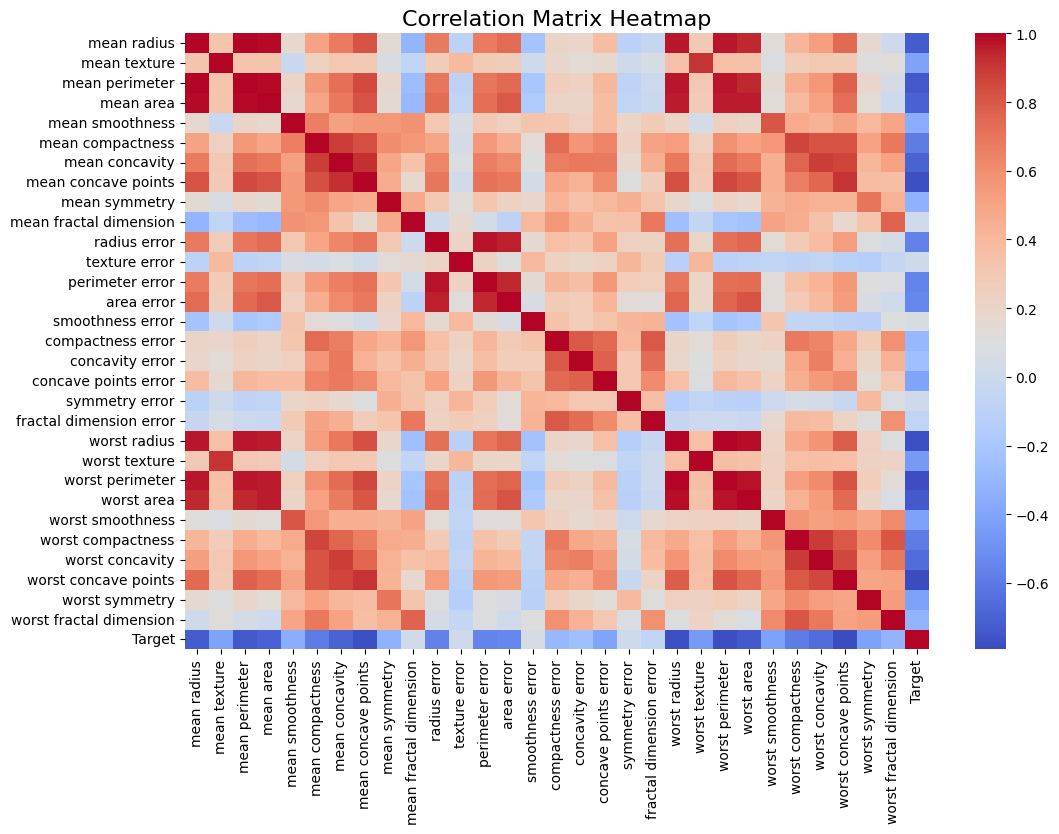

In [19]:
# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="coolwarm", cbar=True, annot=False)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

**Outlier and Feature Distribution Analysis (Box Plots)** :

Box plots are used to visualize the distribution of each feature, its variance, and the presence of Outliers.

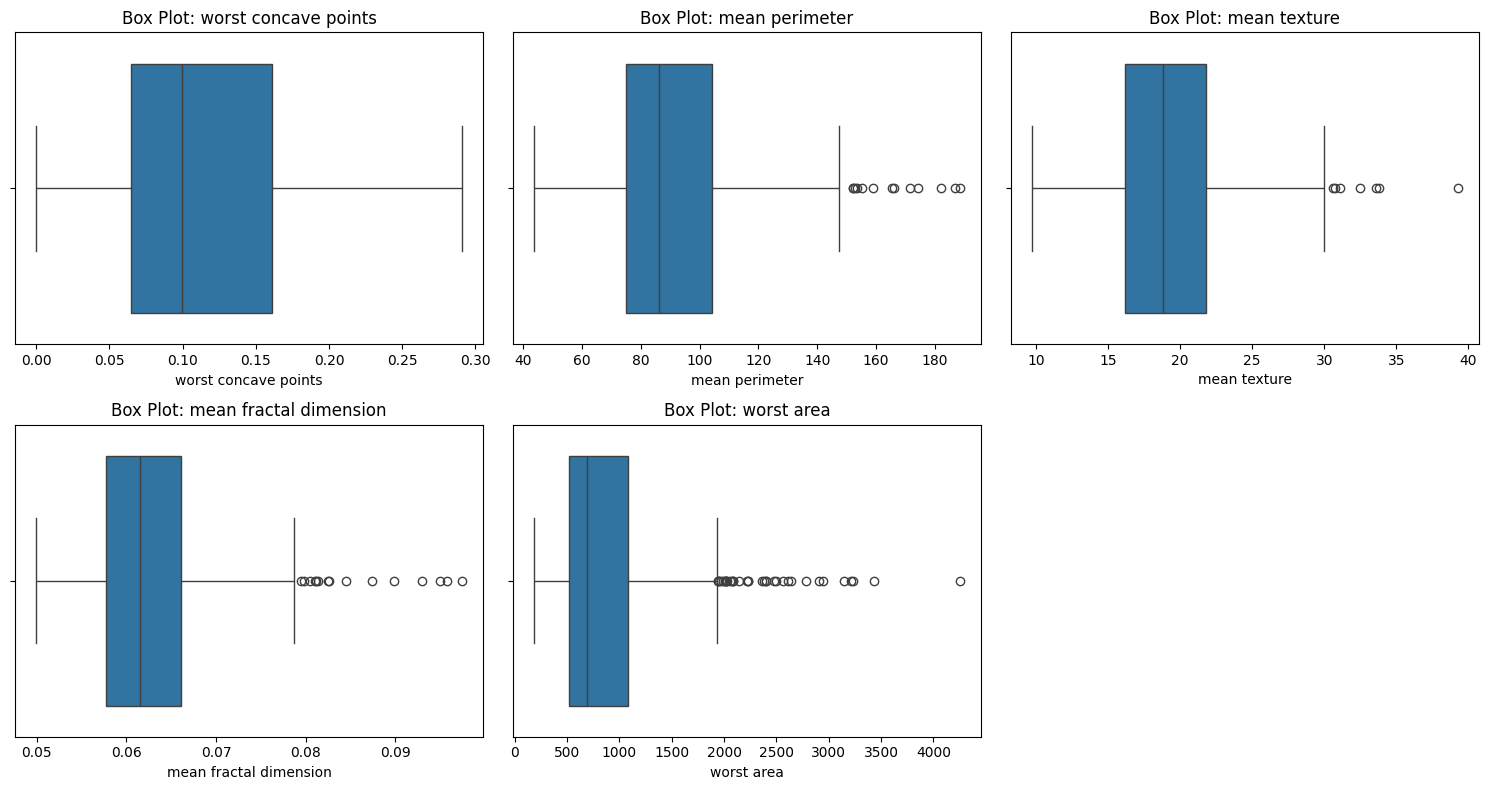

In [20]:
# Selecting features based on the correlation results:
# 1. Top 2 positive correlated features (Benign): 'worst perimeter' and 'worst area' are highly *negatively* correlated. Let's pick 'mean perimeter' and 'mean area' which are also strong.
# 2. Top 2 negative correlated features (Malignant): 'worst concave points', 'worst perimeter'.
# 3. 2 Less important features: 'mean fractal dimension' and 'mean texture'.

features_to_plot_informed = [
    'worst concave points', # Most important (negative correlation)
    'mean perimeter',       # Highly important
    'mean texture',         # Less important
    'mean fractal dimension', # Least important
    'worst area',           # Highly important
]

X_eda = X.drop('Target', axis=1) # Drop the target column for these plots

# Plotting Box Plots for the informed selection of features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_to_plot_informed):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=X_eda[feature])
    plt.title(f'Box Plot: {feature}')
plt.tight_layout()
plt.show()

## Box Plots Analysis: Preprocessing Needs for kNN

The **Box Plots** reveal important distributional issues in the dataset that directly affect the performance of the **k-Nearest Neighbors (kNN)** algorithm.

---

## 1. Scale Disparity is the Main Threat
- **Observation:** Features exhibit massive differences in scale.  
  - Example: *Area* values are in the thousands, while *Fractal Dimension* values are in the tenths.  
- **kNN Impact:**  
  Since kNN relies on **Euclidean Distance**, large-scale features dominate the distance calculation.  
  This makes the algorithm effectively ignore smaller-scale but potentially important features.  
- **Conclusion:**  
  **Feature Scaling (Standardization or Normalization) is MANDATORY.**

---

## 2. Presence of Outliers
- **Observation:** Several features contain **outliers**, visible outside the whiskers of box plots.  
- **Scaling Implication:**  
  Outliers make the dataset sensitive to scaling.  
  Therefore:  
  - `StandardScaler` (Z-score normalization) or  
  - `RobustScaler` (better with outliers)  
  is preferred over `MinMaxScaler`.  

---

## In Short
- The dataset is **unscaled** and **contains outliers**.  
- Scaling is **not optional** → it is **essential** for building a functional and unbiased **kNN model**.  


In [21]:
# Re-define X and y without the 'Target' column for splitting
X = X.drop('Target', axis=1)
y = cancer.target

# Split data into 70% Train and 30% Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)



## 1. Detecting Scale Differences  
- **Observation:** A huge difference in feature ranges is visible (e.g., *area* values vs. *fractal dimension* values).  
- **Implication:** Confirms the **mandatory need for scaling** before applying kNN.  

---

## 2. Detecting Outliers  
- **Observation:** Several isolated points appear outside the vertical whiskers in the box plots.  
- **Implication:** Confirms the **presence of outliers** in most features.  

---

## 3. Scaling Management: Choosing the Right Scaler for kNN  
Because kNN is distance-based, **scaling is not optional**. The presence of outliers makes the choice of scaler more critical.  

| **Scaler**       | **Goal**                              | **Reason to Use / Avoid** |
|------------------|----------------------------------------|---------------------------|
| **StandardScaler** | Transforms data to `Mean = 0` and `Std = 1`. | ✅ Good option: Works well if the data is approximately normally distributed. |
| **MinMaxScaler**   | Rescales features into the range `[0,1]`. | ❌ Weak option: Extremely sensitive to outliers. Outliers define min/max, compressing the main data. |
| **RobustScaler**   | Uses **Median** and **IQR (Interquartile Range)**. | Excellent option: Robust to outliers and a smart choice for this dataset. |

---

**Conclusion:**  
- The dataset shows **scale disparities** and **outliers**.  
- **RobustScaler** (or sometimes StandardScaler) is the most suitable choice for preprocessing before applying kNN.  


In [25]:
# RobustScaler (Uses Median and IQR, robust to Outliers) ---
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

## Why Should the Optimal Value of K Be Found *Before* Training the Final Model?

In the phrase **"Optimal value of K before training the model"**, there are two key concepts:

---

## 1. K is a Hyperparameter (Not a Learned Parameter)
- **K (the number of neighbors)** is a **hyperparameter**.  
- It is **not** a parameter learned from data (like regression coefficients).  
- The value of K must be chosen **before training the final model** and **before using the test set**.

---

## 2. Preventing Data Leakage
The most important reason for finding the **optimal K** beforehand is to avoid **data leakage**.

### Types of Datasets:
- **Training Set:** Used to train the model.  
- **Validation Set (or Cross-Validation):** Used to select the best hyperparameters (such as the best K).  
- **Test Set:** Used for the final, unbiased evaluation of the model **after all decisions are made**.  

---

## Standard Process
1. **Split the data** into Training (which includes Validation/CV) and Test sets.  
2. During **Hyperparameter Tuning**, use methods like **K-Fold Cross-Validation** on the training set to find the best K (the one that minimizes error).  
3. Once the optimal K is selected, **train the final model** using the entire training set with this K.  
4. Finally, evaluate the **final model only once** on the test set.  

---

**Conclusion:**  
The optimal value of **K must be chosen before training the final model** to prevent **data leakage** and to ensure that the test set remains a **true measure of generalization performance**.  


## Optimal value of K

In [26]:
# Hyperparameter Tuning using Grid Search CV on Training Data ---

# 1. Define the range of K candidates (Hyperparameters to search)
# We choose odd K values to prevent voting ties
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21, 2)}

In [36]:
# 2. Define the kNN Model
knn = KNeighborsClassifier(metric='euclidean')

In [28]:
# Define Grid Search Cross-Validation (CV)
# CV=5 means 5-Fold Cross-Validation (The training set is divided into 5 folds)
# scoring='f1' is used as the evaluation metric during CV (better than Accuracy for classification)
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='f1',
    cv=5, # Cross-Validation is run 5 times on the training data
    n_jobs=-1, # Use all available CPU cores for speed
    verbose=1
)

In [30]:
# Execute the search ONLY on the scaled training data
print("Starting Grid Search CV to find Optimal K on the Training Set...")
grid_search.fit(X_train_robust, y_train)

Starting Grid Search CV to find Optimal K on the Training Set...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='f1', verbose=1)

In [31]:
#Extract Optimal K and Final Evaluation

optimal_k = grid_search.best_params_['n_neighbors']
best_f1_score_cv = grid_search.best_score_

In [33]:
print(f"Optimal K value found via 5-Fold Cross-Validation: {optimal_k}")
print(f"Best Mean F1-Score achieved during CV: {best_f1_score_cv:.4f}")

Optimal K value found via 5-Fold Cross-Validation: 5
Best Mean F1-Score achieved during CV: 0.9704


In [45]:
# Predict and generate the Confusion Matrix (cm)
y_pred_final = grid_search.predict(X_test_robust)
cm = confusion_matrix(y_test, y_pred_final)
class_names = cancer.target_names # ['malignant', 'benign']

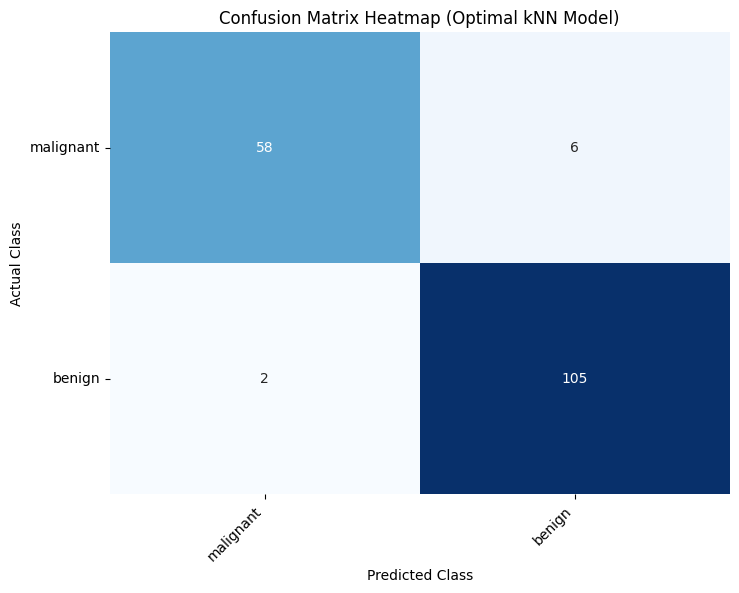

In [47]:
# Visualize the Confusion Matrix as a Heatmap

plt.figure(figsize=(8, 6))

# Create the heatmap using Seaborn
# annot=True: Display the count number in each cell
# fmt='d': Format the annotations as integers
# cmap='Blues': Set the color palette (darker color = higher count)
# cbar=False: Hide the color bar
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=class_names, # Labels for columns (Predicted Class)
    yticklabels=class_names  # Labels for rows (Actual Class)

)
plt.title('Confusion Matrix Heatmap (Optimal kNN Model)')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()
# Top-Left (TN): Actual Malignant, Predicted Malignant (Correct)
# Bottom-Right (TP): Actual Benign, Predicted Benign (Correct)
# Top-Right (FP): Actual Malignant, Predicted Benign (Type I Error - Missed Cancer)
# Bottom-Left (FN): Actual Benign, Predicted Malignant (Type II Error - False Alarm)

In [51]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_test,
        y_pred_final,
        target_names=class_names,
        digits=4
    )
)

              precision    recall  f1-score   support

   malignant     0.9667    0.9062    0.9355        64
      benign     0.9459    0.9813    0.9633       107

    accuracy                         0.9532       171
   macro avg     0.9563    0.9438    0.9494       171
weighted avg     0.9537    0.9532    0.9529       171



### another way to find optimal value of k

In [66]:
# --- Step 1: Calculate Error Rate for K values (1 to 39) ---
error_rate = []
k_values = range(1, 40)
# Loop to calculate the error rate on the Test Set
for i in k_values:
    # Initialize and train the kNN model
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_robust, y_train)

    # Predict on the Test Set
    pred_i = knn.predict(X_test_robust)

    # Calculate the Error Rate: (1 - Accuracy) or (mean of incorrect predictions)
    error_rate.append(np.mean(pred_i != y_test))


In [67]:
# --- Step 2: Find the Optimal K (K with minimum error) ---

# Find the index of the minimum error rate
optimal_k_index = np.argmin(error_rate)

# Find the optimal K value itself
optimal_k = k_values[optimal_k_index]
min_error = error_rate[optimal_k_index]

print(f"Optimal K (Minimum Error Rate): {optimal_k}")
print(f"Minimum Error Rate at K={optimal_k}: {min_error:.4f}")

Optimal K (Minimum Error Rate): 7
Minimum Error Rate at K=7: 0.0292


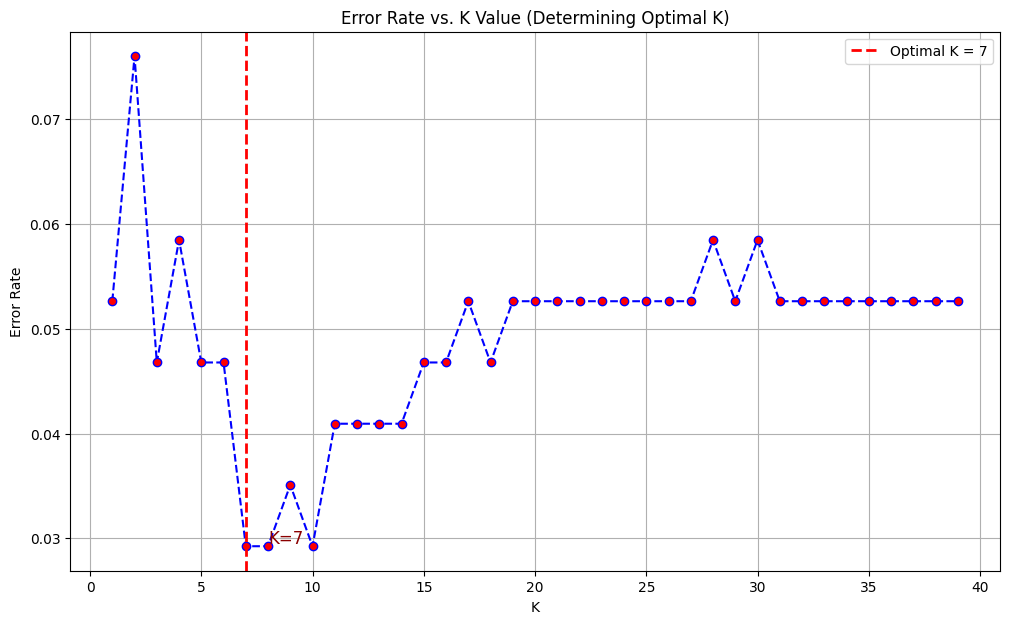

In [68]:
# --- Step 3: Plot the Error Rate Curve and the Vertical Line ---

plt.figure(figsize=(12, 7))

# Plot the Error Rate curve
plt.plot(k_values, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=6)

# Add the Vertical Line for the Optimal K
# plt.axvline draws a vertical line at the specified x-coordinate
plt.axvline(
    x=optimal_k,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Optimal K = {optimal_k}'
)

# Add annotations for the minimum error point (optional but helpful)
plt.text(
    optimal_k + 1, min_error * 1.01,
    f'K={optimal_k}',
    color='darkred',
    fontsize=12
)

plt.title('Error Rate vs. K Value (Determining Optimal K)')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(np.arange(0, 41, 5)) # Improve x-axis ticks
plt.grid(True)
plt.legend()
plt.show()

In [70]:
knn = KNeighborsClassifier(n_neighbors=7)

In [72]:
knn.fit(X_train_robust, y_train)

KNeighborsClassifier(n_neighbors=7)

In [73]:
y_pred = knn.predict(X_test_robust)

In [74]:
knn.score(X_train_robust, y_train)

0.9698492462311558

In [78]:
knn.score(X_test_robust, y_test)

0.9707602339181286